In [1]:
import numpy as np
import matplotlib.pyplot as plt
from acrobotics.util import get_default_axes3d
from acrobotics.recources.robots import Kuka
from acrobotics.path import FreeOrientationPt, TolOrientationPt
from acrobotics.geometry import Shape, Collection
from pyquaternion import Quaternion

In [2]:
q_nominal = Quaternion(axis=[1, 0, 0], angle=np.pi)
# a.transformation_matrix
tf_nominal = np.array([[1, 0, 0, 0],
                       [0, -1, 0, 0],
                       [0, 0, -1, 0],
                       [0, 0, 0, 1.0]])
tf_nominal

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [3]:
robot = Kuka()

path = []
for s in np.linspace(0, 1, 8):
    xi = 0.8
    yi = s * 0.2 + (1-s) * (-0.2)
    zi = 0.2
    #path.append(FreeOrientationPt([xi, yi, zi]))
    path.append(TolOrientationPt([xi, yi, zi], q_nominal))

floor_plane = Shape(0.5, 0.5, 0.1)
floor_plane_tf = np.array([[1, 0, 0, 0.80],
                            [0, 1, 0, 0.00],
                            [0, 0, 1, 0.12],
                            [0, 0, 0, 1]])

# scene = Collection([floor_plane], [floor_plane_tf])
scene = Collection([], [])

In [4]:
from acrobotics.planning import cart_to_joint_no_redundancy
from acrobotics.planning import get_shortest_path

Q = cart_to_joint_no_redundancy(robot, path, scene, num_samples=200)

print([len(qi) for qi in Q])
qp = [qi[0] for qi in Q]

res = get_shortest_path(Q, method='dijkstra')
print(res)
qp_sol = res['path']

Processing point 0/8
sampling near with distance 0.1
Processing point 1/8
sampling near with distance 0.1
Processing point 2/8
sampling near with distance 0.1
Processing point 3/8
sampling near with distance 0.1
Processing point 4/8
sampling near with distance 0.1
Processing point 5/8
sampling near with distance 0.1
Processing point 6/8
sampling near with distance 0.1
Processing point 7/8
sampling near with distance 0.1
[1600, 1600, 1600, 1600, 1600, 1600, 1600, 1600]
{'success': True, 'path': [array([-0.24091592,  1.42027426, -0.31491816, -0.03268771, -1.10039759,
       -0.17992201]), array([-0.17282026,  1.43837392, -0.33577114, -0.03081484, -1.10150027,
       -0.11516225]), array([-0.10350908,  1.45032132, -0.34932852, -0.02527788, -1.10428035,
       -0.08691224]), array([-0.03380062,  1.45652163, -0.35628328, -0.01479291, -1.10482764,
       -0.02083112]), array([ 0.03702081,  1.4564321 , -0.35617381, -0.01029576, -1.10533094,
       -0.01620887]), array([ 0.10772473,  1.4547785

In [15]:
%matplotlib qt

#%% ANIMATE
fig2, ax2 = get_default_axes3d([-1, 1], [-1, 1], [-1, 1])
for pi in path: pi.plot(ax2)
scene.plot(ax2, c='g')
robot.animate_path(fig2, ax2, qp_sol)
plt.show(block=True)

In [9]:
a = [len(qi) for qi in Q]
a[2] = 0
print(a)
np.all(a)

[1600, 1600, 0, 1600, 1600, 1600, 1600, 1600]


False

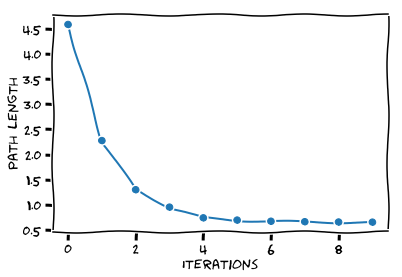

In [3]:
import matplotlib.pyplot as plt
costs = [4.578211784362793, 2.2725138664245605, 1.2967908382415771, 0.9507625102996826,
         0.7383469343185425, 0.6937721371650696, 0.6709966063499451, 0.6612395644187927,
         0.6552581191062927, 0.6525706648826599]

with plt.xkcd():
    plt.plot(costs, 'o-')
    plt.xlabel('Iterations')
    plt.ylabel('Path length')
plt.show()

In [4]:
import matplotlib
matplotlib.font_manager._rebuild()